In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords 

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from bs4 import BeautifulSoup

from sklearn import metrics

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

py.init_notebook_mode(connected=True)

ImportError: No module named iPython.display

In [ ]:
data = pd.read_csv('final.csv')

In [ ]:
data.head()

In [ ]:
# train test split
X_train, X_test, y_train, y_test= train_test_split(data.text, data.code, test_size=0.2, random_state=14)

In [ ]:
np.random.seed(1)
scoring = {'acc': 'accuracy',
           'neg_log_loss': 'neg_log_loss',
           'f1_micro': 'f1_micro'}
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
tfidf2 = CountVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 5000)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 16, 16), random_state=1)
model_clf = Pipeline([('tfidf2', tfidf2), ('clf', clf)])

In [ ]:
results_clf = cross_validate(model_clf, X_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [ ]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_clf['test_acc']),
                                                          np.std(results_clf['test_acc'])))
print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_clf['test_f1_micro']),
                                                          np.std(results_clf['test_f1_micro'])))
print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_clf['test_neg_log_loss']),
                                                          np.std(-1*results_clf['test_neg_log_loss'])))

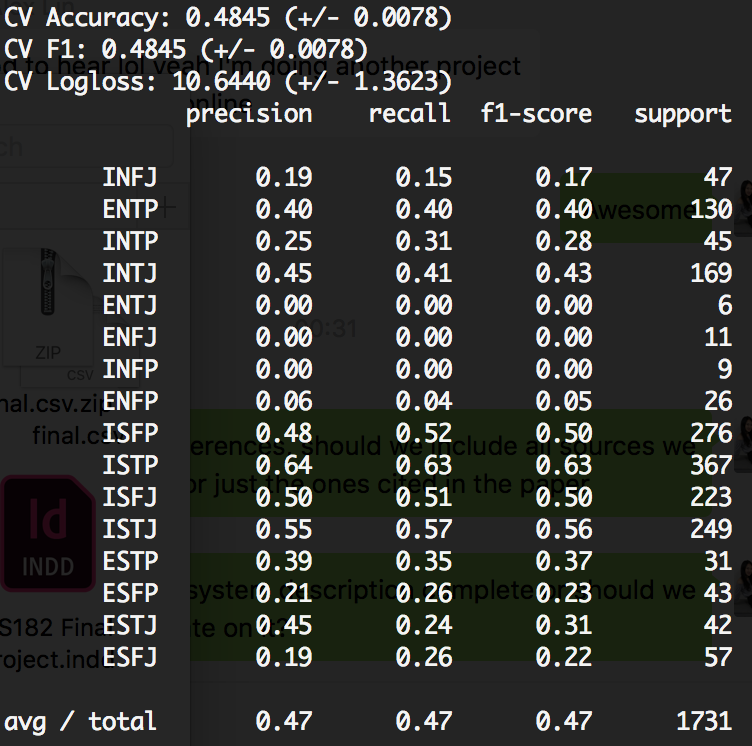

In [6]:
from IPython.display import Image
Image(filename="mlp.png", width=400, height=400)